## Decoding Customer Behavior: A Journey Through RFM Analysis and K-Means Clustering

On my adventure through RFM analysis and K-Means clustering, I uncovered fascinating insights into customer behaviors, segmenting them into meaningful groups based on how recently, how often, and how much they purchase. This journey not only helped me understand customer patterns better but also paved the way for targeted marketing strategies. Next up, I plan to dive deeper into these clusters, tailoring specific approaches to engage each group effectively, enhancing customer satisfaction and loyalty.

### Import libraries

In [ ]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

RFM (Recency, Frequency, Monetary) analysis is an excellent method for understanding customer value in a retail context. This approach segments customers based on:

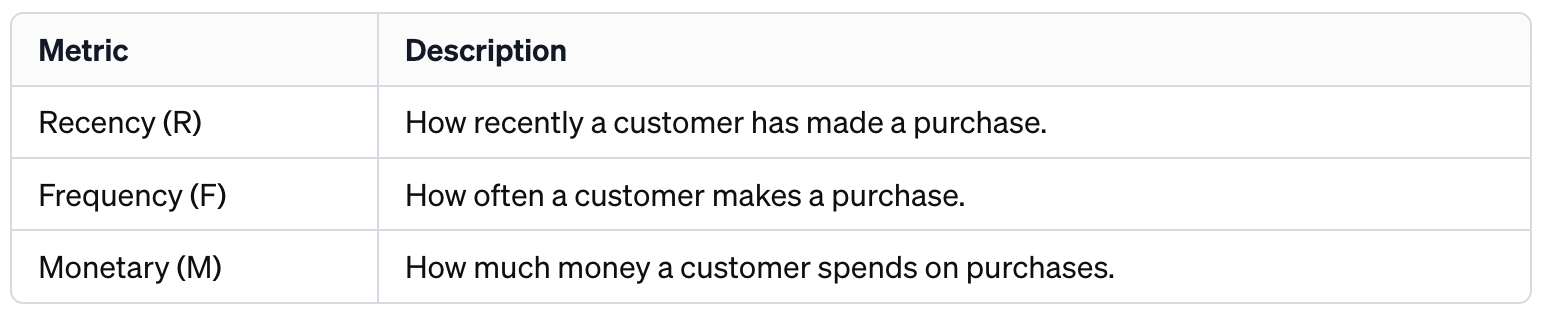

To proceed with the RFM analysis and clustering, I'll first need to inspect the dataset to understand its structure and content. Let's start by loading the data and taking a look at the first few rows.

The dataset contains the following columns:

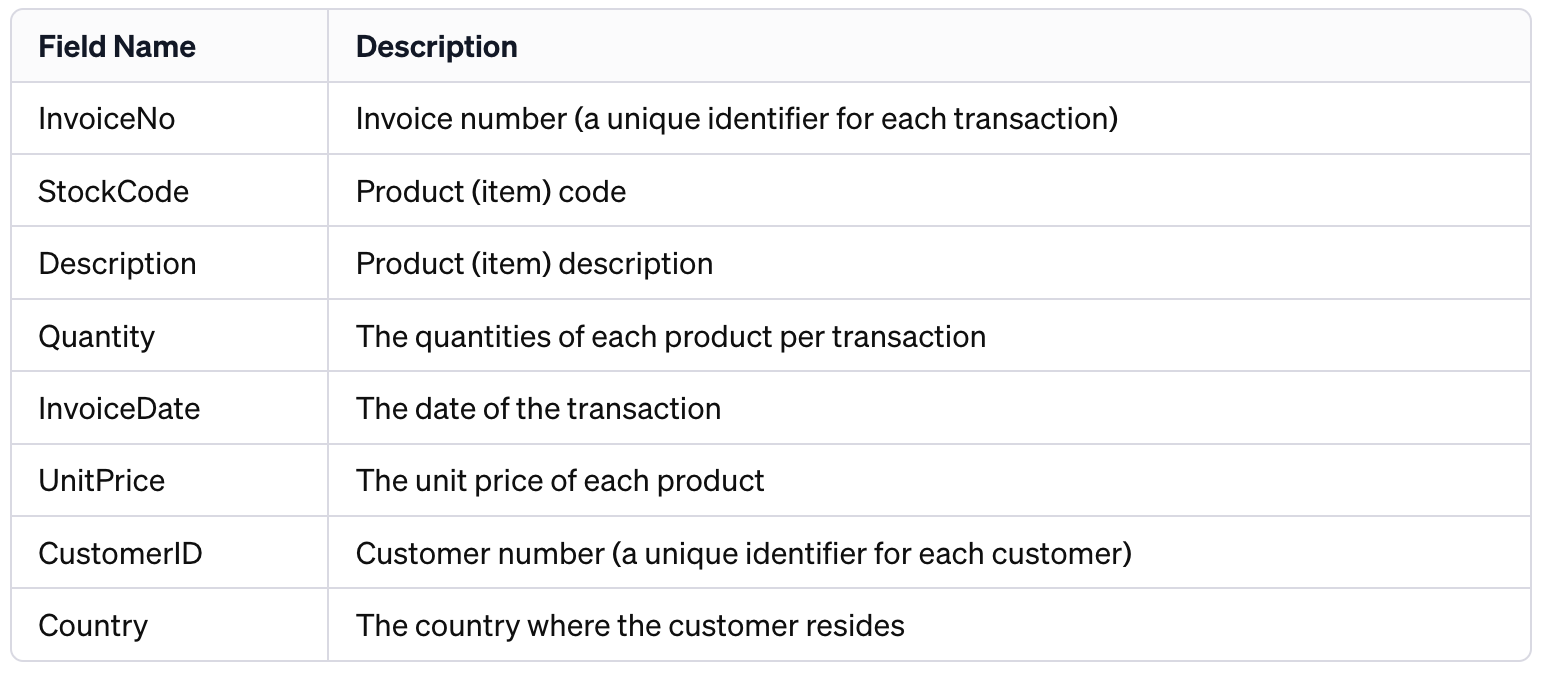

### Efficient Data Preparation: The First Step in Retail Data Analysis
In this code, I begin by loading a dataset of retail transactions and then embark on cleaning and restructuring the data. This involves converting 'InvoiceDate' to a usable datetime format, removing transactions with negative quantities, calculating the total price of each transaction, and ensuring that each record has a valid 'CustomerID'.

In [ ]:
# Load the dataset
file_path = '/content/online_retail_data.csv'
retail_data = pd.read_csv(file_path)

# Convert 'InvoiceDate' to datetime
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], format='%d/%m/%y %H:%M')

retail_data = retail_data[retail_data['Quantity'] > 0]  # Remove negative quantities
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']
retail_data = retail_data.dropna(subset=['CustomerID'])
retail_data['CustomerID'] = retail_data['CustomerID'].astype(int)

<ipython-input-2-394cd9942982>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']


### Unveiling Customer Insights: The Heart of RFM Analysis
In this part of my code, I calculated the RFM (Recency, Frequency, Monetary) metrics by first setting a reference date (one day after the latest purchase in the dataset) and then grouped the data by customer. For each customer,
I found out
- how recently they made a purchase,
- how many purchases they've made, and
- how much they've spent in total.

This process is key to understanding customer behavior in detail.

In [ ]:
# RFM Calculation
reference_date = retail_data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm_data = retail_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

### Finding the Perfect Balance: Normalization and Cluster Count in Data Analysis
In my code, I first normalized the Recency, Frequency, and Monetary values using the StandardScaler, making sure they're all on a comparable scale for K-Means clustering. Then, to find the ideal number of clusters, I used the Elbow Method, plotting the within-cluster sum of squares (WCSS) against different cluster counts, looking for the 'elbow' point where the WCSS starts to plateau

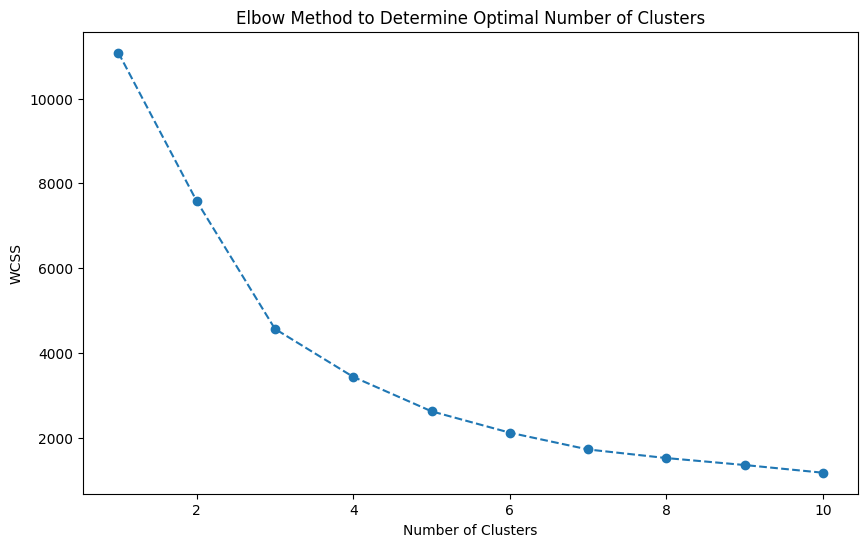

In [ ]:
# Normalizing the RFM data for K-Means
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

# Plotting the results to find the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Delving into Data: My K-Means Clustering Experience
In this part of my data journey, I applied K-Means Clustering to segment customers into four distinct groups based on their purchasing behavior. After configuring and running the K-Means algorithm on the normalized RFM data, I tagged each customer with their respective cluster, revealing intriguing patterns and groupings within the dataset.

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(rfm_normalized)
rfm_data['Cluster'] = clusters
rfm_data

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,2,17,262.58,0
12348,75,2,224.40,0
12349,19,3,60.00,0
12350,310,2,40.20,1
12352,36,9,174.53,0
...,...,...,...,...
18278,74,2,32.00,0
18280,278,1,23.60,1
18282,8,3,52.17,0


### Decoding Customer Clusters: My Analysis Breakdown
In this final part of my data exploration, I grouped the customers into clusters and calculated the average recency, frequency, and monetary values for each cluster. This step was like taking a closer look at each group, understanding their unique shopping patterns. Finally, I counted the number of customers in each cluster, giving me a complete picture of how these groups were distributed in my dataset.

In [ ]:
# Analyzing the Clusters
cluster_analysis = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).sort_values(by='Cluster', ascending=True)
cluster_analysis['Count'] = rfm_data.groupby('Cluster').size()
cluster_analysis

,Recency,Frequency,Monetary,Count
Cluster,,,,
0,43.197851,11.116339,209.169093,2699
1,246.245668,3.530071,69.265362,981
2,2.000000,546.000000,6774.505000,4
3,6.200000,103.900000,10997.454000,10


## Cluster Analysis
### Cluster 0:

- **Recency:** On average, customers made their last purchase around 43 days ago.
- **Frequency:** They made an average of 11 purchases.
- **Monetary:** Average spending is around $209.
- **Count:** This cluster contains 2699 customers.

### Cluster 1:
- **Recency:** Customers in this cluster made their last purchase around 246 days ago.
- **Frequency:** They have a lower frequency with an average of 3.5 purchases.
- **Monetary:** Average spending is about $69.
- **Count:** There are 981 customers in this cluster.

### Cluster 2:

- **Recency:** These customers made their last purchase very recently, 2 days ago.
- **Frequency:** Extremely high frequency with 546 purchases on average.
- **Monetary:** Very high spending, averaging around $6774.
- **Count:** A small cluster with only 4 customers.

### Cluster 3:
- **Recency:** Last purchase was made around 6 days ago.
- **Frequency:** High frequency with an average of 104 purchases.
- **Monetary:** The highest spending cluster, with an average of $10997.
- **Count:** Contains 10 customers.

## Insights
- **Cluster 0** represents regular customers with moderate frequency and spending.
- **Cluster 1** includes customers who haven't purchased recently, with low frequency and spending.
- **Cluster 2** is a unique small group with very recent purchases, extremely high frequency, and high spending.
- **Cluster 3** consists of premium customers with recent purchases, high frequency, and the highest spending.

This clustering provides a nuanced view of different customer behaviors, which can inform targeted marketing strategies and customer engagement initiatives.